<a href="https://colab.research.google.com/github/mahammadaftab/Machine-Learning-Lab/blob/main/Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
data=fetch_california_housing()

In [ ]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
df['MedHouseVal']=data.target

In [ ]:
print("\ndata Information:")
df.info()


data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
print("\nSummary statics of the fataset:")
print(df.describe())


Summary statics of the fataset:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  

<Figure size 1200x800 with 0 Axes>

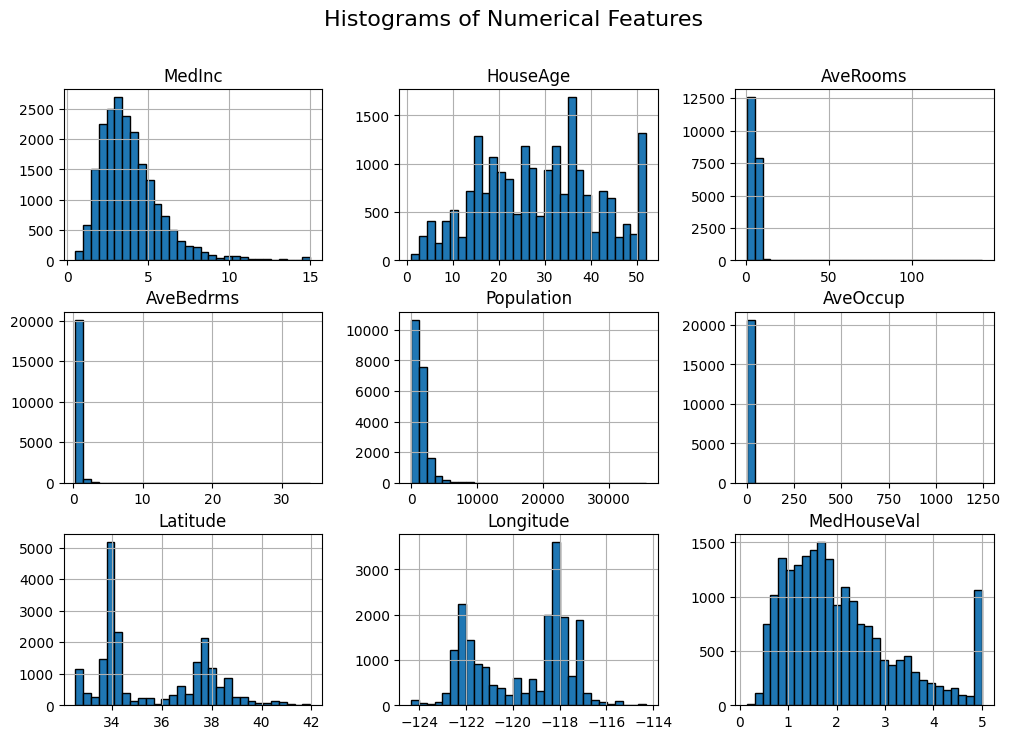

In [ ]:
plt.figure(figsize=(12,8))
df.hist(bins=30,figsize=(12,8),edgecolor='black')
plt.suptitle("Histograms of Numerical Features",fontsize=16)
plt.show()

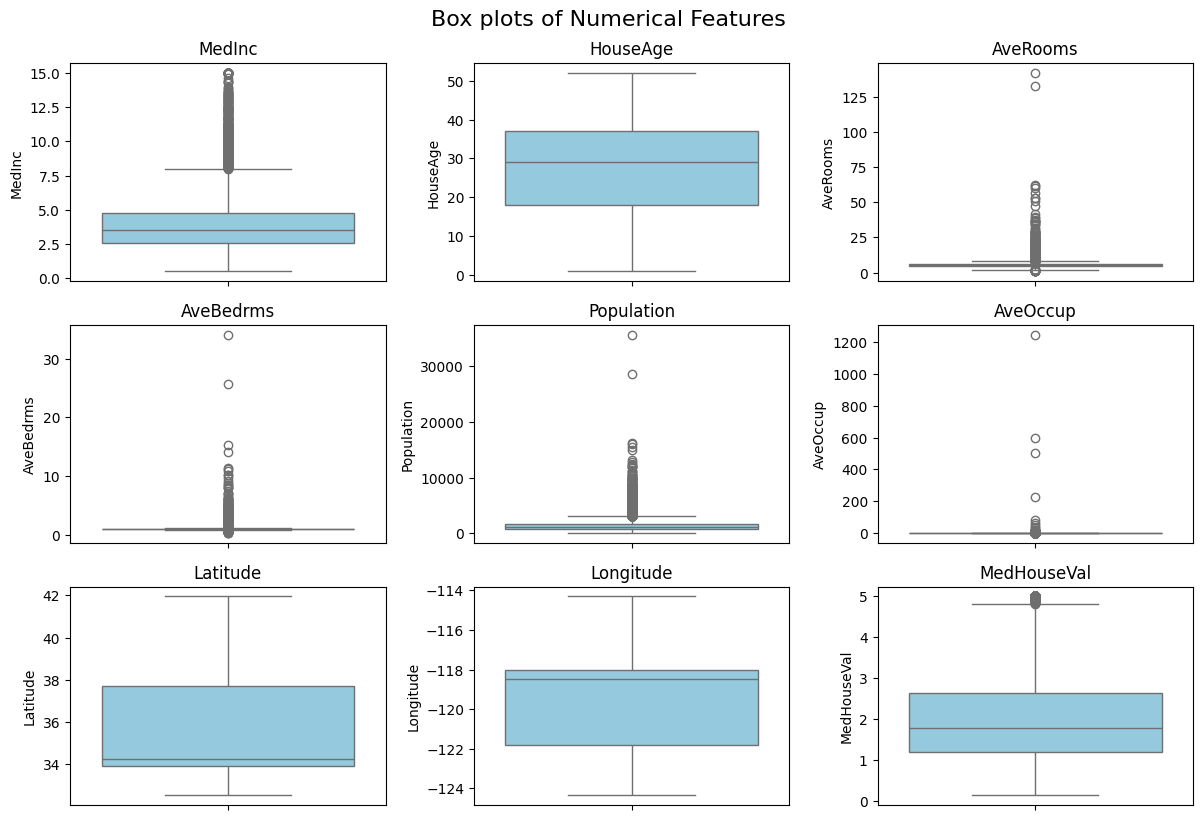

In [ ]:
plt.figure(figsize=(12,8))
for i,column in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[column],color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.suptitle("Box plots of Numerical Features",fontsize=16,y=1.02)
plt.show()

In [ ]:
def identify_outliers(df):
  outliers={}
  for column in df.columns:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers[column]=df[(df[column]<lower_bound) | (df[column]>upper_bound)][column].count()
  return outliers

In [29]:
outliers=identify_outliers(df)
outlier_df=pd.DataFrame.from_dict(outliers,orient='index',columns=['outlier count'])
print("\nOutlier counts per feature:")
print(outlier_df)


Outlier counts per feature:
             outlier count
MedInc                 681
HouseAge                 0
AveRooms               511
AveBedrms             1424
Population            1196
AveOccup               711
Latitude                 0
Longitude                0
MedHouseVal           1071


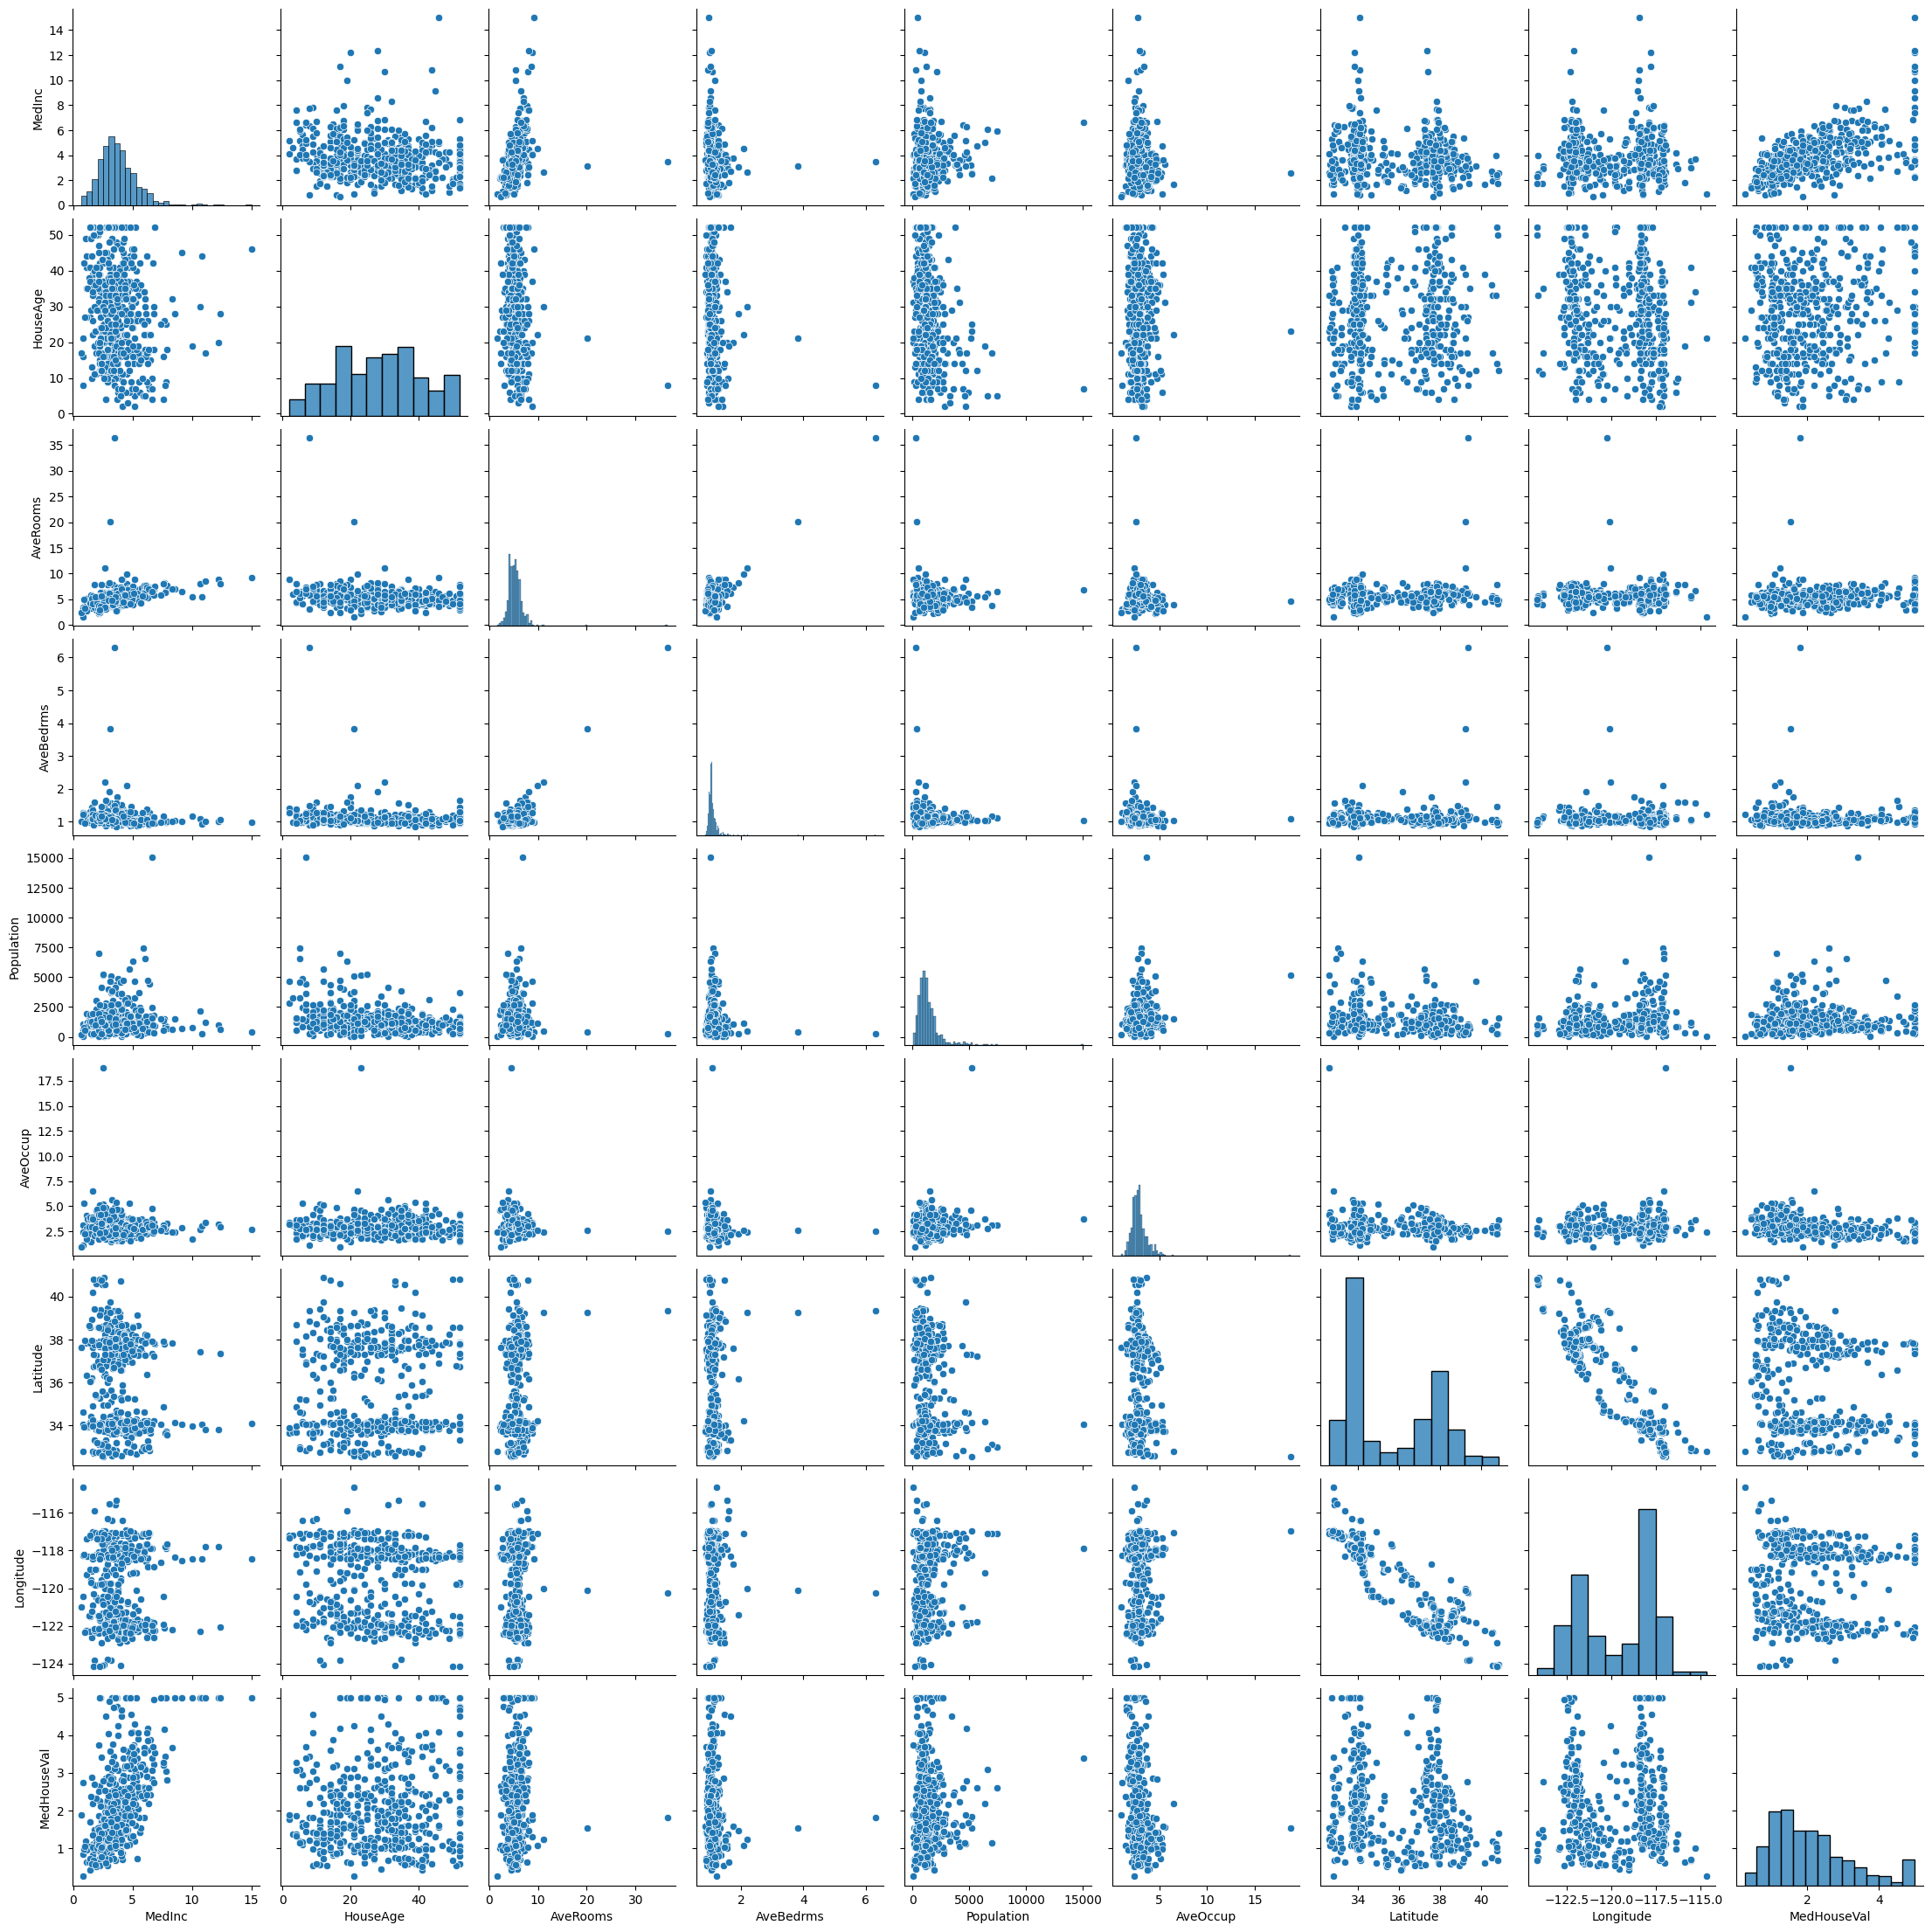

In [30]:
sns.pairplot(df.sample(500))
plt.show()